- age
    - younger vs. older people and decile scores, hypothesize with equivalent means
    - age-specific, using percentage of those who reoffend and see where each age compares to the mean of all people
    
- decile score

- years between offenses

- race
    - compared with decile score and violent decile score in more depth




In [1996]:
import numpy as np
import pandas as pd

from IPython.display import Image

import warnings
warnings.simplefilter("ignore")

In [1997]:
compas = pd.read_csv("Compas.csv")

In [1998]:
compas.drop(compas.columns[0], axis = 1)

id     first           last   sex  age          age_cat  \
0          1    miguel      hernandez  Male   69  Greater than 45   
1          2   michael           ryan  Male   31          25 - 45   
2          3     kevon          dixon  Male   34          25 - 45   
3          4        ed          philo  Male   24     Less than 25   
4          5     marcu          brown  Male   23     Less than 25   
...      ...       ...            ...   ...  ...              ...   
11752  11753   patrick       hamilton  Male   47  Greater than 45   
11753  11754   raymond      hernandez  Male   22     Less than 25   
11754  11755  dieuseul  pierre-gilles  Male   35          25 - 45   
11755  11756     scott     lomagistro  Male   29          25 - 45   
11756  11757      chin            yan  Male   34          25 - 45   

                   race  juv_fel_count  decile_score  juv_misd_count  \
0                 Other              0             1               0   
1             Caucasian              0             5               0   
2      African-American              0             3               0   
3      African-American              0             4               0   
4      African-American              0             8               1   
...                 ...            ...           ...             ...   
11752             Other              0             3               0   
11753         Caucasian              0             7               3   
11754             Other              0             4               0   
11755         Caucasian              0             3               0   
11756             Asian              0             1               0   

       juv_other_count  priors_count  is_recid  is_violent_recid  \
0                    0             0         0                 0   
1                    0             0        -1                 0   
2                    0             0         1                 1   
3                    1             4         1                 0   
4                    0             1         0                 0   
...                ...           ...       ...               ...   
11752                0             1         0                 0   
11753                5             3         1                 0   
11754                0             0         0                 0   
11755                0             2         0                 0   
11756                0             0         0                 0   

       v_decile_score v_score_text  decile_score.1 score_text  
0                   1          Low               1        Low  
1                   2          Low               5     Medium  
2                   1          Low               3        Low  
3                   3          Low               4        Low  
4                   6       Medium               8       High  
...               ...          ...             ...        ...  
11752               1          Low               3        Low  
11753               5       Medium               7     Medium  
11754               3          Low               4        Low  
11755               2          Low               3        Low  
11756               1          Low               1        Low  

[11757 rows x 18 columns]

In [1999]:
young = compas[compas.age_cat == "Less than 25"].v_decile_score
middle = compas[compas.age_cat == "25 - 45"].v_decile_score
old = compas[compas.age_cat == "Greater than 45"].v_decile_score

In [2000]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

These tests are just checking if one age group has a higher risk of violence than the other

In [2001]:
print(young.mean(), middle.mean(), old.mean())

6.049180327868853 3.3771995788840425 1.7897301349325336


In [2002]:
tstat, pvalue, ddof = ttest_ind(
                                young,
                                middle,
                                alternative="larger",
                                usevar="unequal"
)
print(tstat, pvalue, ddof)

56.21398274904184 0.0 5172.47658225915


In [2003]:
 tstat, pvalue, ddof = ttest_ind(
                                middle,
                                old,
                                alternative="larger",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof)    

38.63847158703123 5.2422454240000335e-297 7127.205606761121


In [2004]:
tstat, pvalue, ddof = ttest_ind(
                                young,
                                old,
                                alternative="larger",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

87.24747908351314 0.0 4723.302717729157


In [2005]:
highrisk = compas[compas.score_text == "High"]
highrisk = highrisk[(highrisk.is_recid != -1) & (highrisk.decile_score != -1)]
## -1 = unknown, so those were deleted

In [2006]:
highrisk["accuracy"] = (highrisk.is_recid == 1)
##checked if is_recid is True with high risk decile score to determine accuracy

In [2007]:
young2 = highrisk[highrisk.age_cat == "Less than 25"].accuracy
middle2 = highrisk[highrisk.age_cat == "25 - 45"].accuracy
old2 = highrisk[highrisk.age_cat == "Greater than 45"].accuracy
##subset by age

In [2008]:
print(young2.mean(), middle2.mean(), old2.mean())

0.5481927710843374 0.5325732899022801 0.4251207729468599


In [2009]:
 tstat, pvalue, ddof = ttest_ind(
                                young2,
                                middle2,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

0.6505547751165384 0.5154436817845576 1361.6788657477787


In [2010]:
 tstat, pvalue, ddof = ttest_ind(
                                young2,
                                old2,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

3.116051265304813 0.001986434026815587 345.5133605030412


In [2011]:
 tstat, pvalue, ddof = ttest_ind(
                                middle2,
                                old2,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

2.882869983424161 0.004244991793179706 281.10125290631083


These hypothesis tests were checking if there was a significant difference between the age groups accuracy. 
It seems as though there is a signifcant difference between the younger two groups and the oldest group.
It would also be a good idea to look at low risk. 

In [2012]:
##same procedure but with low risk
lowrisk = compas[compas.score_text == "Low"]
lowrisk = lowrisk[(lowrisk.is_recid != -1) & (lowrisk.decile_score != -1)]

In [2013]:
lowrisk["accuracy"] = (lowrisk.is_recid == 0)
##accurate if is_recid == 0

In [2014]:
young3 = lowrisk[lowrisk.age_cat == "Less than 25"].accuracy
middle3 = lowrisk[lowrisk.age_cat == "25 - 45"].accuracy
old3 = lowrisk[lowrisk.age_cat == "Greater than 45"].accuracy

In [2015]:
print(young3.mean(), middle3.mean(), old3.mean())

0.690734055354994 0.7607060185185185 0.8178879310344828


In [2016]:
 tstat, pvalue, ddof = ttest_ind(
                                young3,
                                middle3,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

-3.9737509848699326 7.499325893430174e-05 1192.5917089874865


In [2017]:
 tstat, pvalue, ddof = ttest_ind(
                                young3,
                                old3,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

-6.919646610619877 6.9337001458953706e-12 1369.0461762834632


In [2018]:
 tstat, pvalue, ddof = ttest_ind(
                                middle3,
                                old3,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

-4.958642361248988 7.383646858476191e-07 4132.705113743328


The low risk accuracy for the oldest group is much higher.
The differences in accuracy are significant between all groups. They likely do not have the same average accuracy. 
Since the average accuracy for the oldest group is significantly lower for high risk and higher for low risk, this may mean this algorithm may give the older group lower scores in general. 

# Comparing the accuracy of "High" predictive values across race and sex

In [2019]:
compasrisk = compas[(compas.race == "African-American") | (compas.race == "Caucasian")]
compasrisk = compasrisk[(compasrisk.is_recid != -1) & (compasrisk.decile_score != -1)]
highriskrace = compasrisk[(compasrisk.score_text == "High")]
lowriskrace  = compasrisk[(compasrisk.score_text == "Low")]
highriskrace["accuracyhigh"] = (compasrisk.is_recid == 1)
lowriskrace["accuracylow"] = (compasrisk.is_recid == 0)

In [2020]:
HWhitt = highriskrace[(highriskrace.race=="Caucasian")&(highriskrace.score_text=="High")].accuracyhigh
HWhitemen = highriskrace[(highriskrace.race=="Caucasian")&(highriskrace.sex=="Male")&(highriskrace.score_text=="High")].accuracyhigh
HWhitewomen = highriskrace[(highriskrace.race=="Caucasian")&(highriskrace.sex=="Female")&(highriskrace.score_text=="High")].accuracyhigh
HBlakk = highriskrace[(highriskrace.race=="African-American")&(highriskrace.score_text=="High")].accuracyhigh
HBlackmen = highriskrace[(highriskrace.race=="African-American")&(highriskrace.sex=="Male")&(highriskrace.score_text=="High")].accuracyhigh
HBlackwomen = highriskrace[(highriskrace.race=="African-American")&(highriskrace.sex=="Female")&(highriskrace.score_text=="High")].accuracyhigh

LWhitt = lowriskrace[(lowriskrace.race=="Caucasian")&(lowriskrace.score_text=="Low")].accuracylow
LWhitemen = lowriskrace[(lowriskrace.race=="Caucasian")&(lowriskrace.sex=="Male")&(lowriskrace.score_text=="Low")].accuracylow
LWhitewomen = lowriskrace[(lowriskrace.race=="Caucasian")&(lowriskrace.sex=="Female")&(lowriskrace.score_text=="Low")].accuracylow
LBlakk = lowriskrace[(lowriskrace.race=="African-American")&(lowriskrace.score_text=="Low")].accuracylow
LBlackmen = lowriskrace[(lowriskrace.race=="African-American")&(lowriskrace.sex=="Male")&(lowriskrace.score_text=="Low")].accuracylow
LBlackwomen = lowriskrace[(lowriskrace.race=="African-American")&(lowriskrace.sex=="Female")&(lowriskrace.score_text=="Low")].accuracylow

In [2021]:
tstat, pvalue, ddof = ttest_ind(HWhitt,HBlakk,alternative="smaller",usevar="unequal")
tstat1, pvalue1, ddof1 = ttest_ind(HWhitemen,HBlackmen,alternative="smaller",usevar="unequal")
tstat2, pvalue2, ddof2 = ttest_ind(HWhitewomen,HBlackwomen,alternative="smaller",usevar="unequal")
tstat3, pvalue3, ddof3 = ttest_ind(HBlackwomen,HWhitemen,alternative="smaller",usevar="unequal")
tstat4, pvalue4, ddof4 = ttest_ind(HWhitewomen,HBlackmen,alternative="smaller",usevar="unequal")
tstat5, pvalue5, ddof5 = ttest_ind(HWhitewomen,HWhitemen,alternative="smaller",usevar="unequal")
tstat6, pvalue6, ddof6 = ttest_ind(HBlackwomen,HBlackmen,alternative="smaller",usevar="unequal")

Ltstat, Lpvalue, Lddof = ttest_ind(LWhitt,LBlakk,alternative="larger",usevar="unequal")
Ltstat1, Lpvalue1, Lddof1 = ttest_ind(LWhitemen,LBlackmen,alternative="larger",usevar="unequal")
Ltstat2, Lpvalue2, Lddof2 = ttest_ind(LWhitewomen,LBlackwomen,alternative="larger",usevar="unequal")
Ltstat3, Lpvalue3, Lddof3 = ttest_ind(LBlackwomen,LWhitemen,alternative="larger",usevar="unequal")
Ltstat4, Lpvalue4, Lddof4 = ttest_ind(LWhitewomen,LBlackmen,alternative="larger",usevar="unequal")
Ltstat5, Lpvalue5, Lddof4 = ttest_ind(LWhitewomen,LWhitemen,alternative="larger",usevar="unequal")
Ltstat6, Lpvalue6, Lddof5 = ttest_ind(LBlackwomen,LBlackmen,alternative="larger",usevar="unequal")

In [2022]:
print("High risk accuracy p-value", "\n","\n"
      "White and Black p-value:", round(pvalue, 4), "\n" 
      "White men and Black men p-value:", round(pvalue1, 4),"\n"
      "White women and Black women p-value:", round(pvalue2, 4),"\n"
      "Black women and White men p-value:", round(pvalue3, 4), "\n"
      "White women and Black men p-value:",round(pvalue4, 4), "\n"
      "White women and White men p-value:", round(pvalue5, 4), "\n"
      "Black women and Black men p-value:", round(pvalue6, 4), "\n" "\n"
      "Low risk accuracy p-value", "\n","\n"
      "White and Black p-value:", round(Lpvalue, 4), "\n" 
      "White men and Black men p-value:", round(Lpvalue1, 4),"\n"
      "White women and Black women p-value:", round(Lpvalue2, 4),"\n"
      "Black women and White men p-value:", round(Lpvalue3, 4), "\n"
      "White women and Black men p-value:", round(Lpvalue4, 4), "\n"
      "White women and White men p-value:", round(Lpvalue5, 4), "\n"
      "Black women and Black men p-value:", round(Lpvalue6, 4), "\n")

High risk accuracy p-value 
 
White and Black p-value: 0.0557 
White men and Black men p-value: 0.251 
White women and Black women p-value: 0.1496 
Black women and White men p-value: 0.033 
White women and Black men p-value: 0.0005 
White women and White men p-value: 0.0048 
Black women and Black men p-value: 0.0032 

Low risk accuracy p-value 
 
White and Black p-value: 0.0 
White men and Black men p-value: 0.0 
White women and Black women p-value: 0.5392 
Black women and White men p-value: 0.0031 
White women and Black men p-value: 0.0 
White women and White men p-value: 0.0035 
Black women and Black men p-value: 0.0 



# Findings

### There is a statistically significant discrepancy in the accuracies of "High" predictive values for recidivism when comparing:
- Black women and White men
- White women and Black men 
- White women and White men  
- Black women and Black men 

### There is a statistically significant discrepancy in the accuracies of "Low" predictive values for recidivism when comparing:
- White and Black overall population
- White men and Black men 
- White men and Black women 
- White women and Black men
- White women and White men
- Black women and Black men

# Data being compared:

In [2023]:
highvisual = highriskrace.groupby(["race", "sex", "score_text"])[["accuracyhigh"]].mean()
highvisual

accuracyhigh
race             sex    score_text              
African-American Female High            0.446701
                 Male   High            0.551416
Caucasian        Female High            0.384615
                 Male   High            0.530351

In [2024]:
lowvisual = lowriskrace.groupby(["race", "sex", "score_text"])[["accuracylow"]].mean()
lowvisual

accuracylow
race             sex    score_text             
African-American Female Low            0.829175
                 Male   Low            0.698218
Caucasian        Female Low            0.826923
                 Male   Low            0.777157

# Comparing the accuracy of "Low" predictive values across race and sex

In [2025]:
import numpy as np
import pandas as pd

from IPython.display import Image

import warnings

from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
vcompasrisk = compas[(compas.race == "African-American") | (compas.race == "Caucasian")]
vcompasrisk = vcompasrisk[(vcompasrisk.is_violent_recid != -1) & (vcompasrisk.v_decile_score != -1)]
vhighriskrace = vcompasrisk[(vcompasrisk.v_score_text == "High")]
vlowriskrace  = vcompasrisk[(vcompasrisk.v_score_text == "Low")]
vhighriskrace["vaccuracyhigh"] = (vcompasrisk.is_violent_recid == 1)
vlowriskrace["vaccuracylow"] = (vcompasrisk.is_violent_recid == 0)

VHWhitt = vhighriskrace[(vhighriskrace.race=="Caucasian")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHWhitemen = vhighriskrace[(vhighriskrace.race=="Caucasian")&(vhighriskrace.sex=="Male")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHWhitewomen = vhighriskrace[(vhighriskrace.race=="Caucasian")&(vhighriskrace.sex=="Female")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHBlakk = vhighriskrace[(vhighriskrace.race=="African-American")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHBlackmen = vhighriskrace[(vhighriskrace.race=="African-American")&(vhighriskrace.sex=="Male")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHBlackwomen = vhighriskrace[(vhighriskrace.race=="African-American")&(vhighriskrace.sex=="Female")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh

VLWhitt = vlowriskrace[(vlowriskrace.race=="Caucasian")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLWhitemen = vlowriskrace[(vlowriskrace.race=="Caucasian")&(vlowriskrace.sex=="Male")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLWhitewomen = vlowriskrace[(vlowriskrace.race=="Caucasian")&(vlowriskrace.sex=="Female")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLBlakk = vlowriskrace[(vlowriskrace.race=="African-American")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLBlackmen = vlowriskrace[(vlowriskrace.race=="African-American")&(vlowriskrace.sex=="Male")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLBlackwomen = vlowriskrace[(vlowriskrace.race=="African-American")&(vlowriskrace.sex=="Female")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
Vtstat, Vpvalue, Vddof = ttest_ind(VHWhitt,VHBlakk,alternative="smaller",usevar="unequal")
Vtstat1, Vpvalue1, Vddof1 = ttest_ind(VHWhitemen,VHBlackmen,alternative="smaller",usevar="unequal")
Vtstat2, Vpvalue2, Vddof2 = ttest_ind(VHBlackwomen,VHWhitewomen,alternative="smaller",usevar="unequal")
Vtstat3, Vpvalue3, Vddof3 = ttest_ind(VHBlackwomen,VHWhitemen,alternative="smaller",usevar="unequal")
Vtstat4, Vpvalue4, Vddof4 = ttest_ind(VHWhitewomen,VHBlackmen,alternative="smaller",usevar="unequal")
Vtstat5, Vpvalue5, Vddof5 = ttest_ind(VHWhitemen,VHWhitewomen,alternative="smaller",usevar="unequal")
Vtstat6, Vpvalue6, Vddof6 = ttest_ind(VHBlackwomen,VHBlackmen,alternative="smaller",usevar="unequal")

VLtstat, VLpvalue, VLddof = ttest_ind(VLWhitt,VLBlakk,alternative="larger",usevar="unequal")
VLtstat1, VLpvalue1, VLddof1 = ttest_ind(VLWhitemen,VLBlackmen,alternative="larger",usevar="unequal")
VLtstat2, VLpvalue2, VLddof2 = ttest_ind(VLWhitewomen,VLBlackwomen,alternative="larger",usevar="unequal")
VLtstat3, VLpvalue3, VLddof3 = ttest_ind(VLWhitemen,VLBlackwomen,alternative="larger",usevar="unequal")
VLtstat4, VLpvalue4, VLddof4 = ttest_ind(VLWhitewomen,VLBlackmen,alternative="larger",usevar="unequal")
VLtstat5, VLpvalue5, VLddof4 = ttest_ind(VLWhitewomen,VLWhitemen,alternative="larger",usevar="unequal")
VLtstat6, VLpvalue6, VLddof5 = ttest_ind(VLBlackwomen,VLBlackmen,alternative="larger",usevar="unequal")
print("High risk accuracy p-value", "\n","\n"
      "White and Black p-value:", round(Vpvalue, 4), "\n" 
      "White men and Black men p-value:", round(Vpvalue1, 4),"\n"
      "Black women and White women p-value:", round(Vpvalue2, 4),"\n"
      "Black women and White men p-value:", round(Vpvalue3, 4), "\n"
      "White women and Black men p-value:",round(Vpvalue4, 4), "\n"
      "White men and White women p-value:", round(Vpvalue5, 4), "\n"
      "Black women and Black men p-value:", round(Vpvalue6, 4), "\n" "\n"

      "Low risk accuracy p-value", "\n","\n"
      "White and Black p-value:", round(VLpvalue, 4), "\n" 
      "White men and Black men p-value:", round(VLpvalue1, 4),"\n"
      "White women and Black women p-value:", round(VLpvalue2, 4),"\n"
      "White men and Black women p-value:", round(VLpvalue3, 4), "\n"
      "White women and Black men p-value:", round(VLpvalue4, 4), "\n"
      "White women and White men p-value:", round(VLpvalue5, 4), "\n"
      "Black women and Black men p-value:", round(VLpvalue6, 4), "\n")


High risk accuracy p-value 
 
White and Black p-value: 0.0857 
White men and Black men p-value: 0.0652 
Black women and White women p-value: 0.3683 
Black women and White men p-value: 0.3224 
White women and Black men p-value: 0.3133 
White men and White women p-value: 0.4626 
Black women and Black men p-value: 0.0468 

Low risk accuracy p-value 
 
White and Black p-value: 0.0025 
White men and Black men p-value: 0.0332 
White women and Black women p-value: 0.0052 
White men and Black women p-value: 0.4338 
White women and Black men p-value: 0.0 
White women and White men p-value: 0.0006 
Black women and Black men p-value: 0.1287 



# Findings

### There is a statistically significant discrepancy in the accuracies of "High" predictive values for recidivism when comparing: 
- Black women and Black men 

### There is a statistically significant discrepancy in the accuracies of "Low" predictive values for recidivism when comparing:
- White and Black overall population
- White men and Black men
- White women and Black women
- White women and Black men
- White women and White men

# Data being compared:

In [2026]:
Violenthighvisual = vhighriskrace.groupby(["race", "sex", "v_score_text"])[["vaccuracyhigh"]].mean()
Violenthighvisual

vaccuracyhigh
race             sex    v_score_text               
African-American Female High               0.108108
                 Male   High               0.173913
Caucasian        Female High               0.136364
                 Male   High               0.128834

In [2027]:
Violentlowvisual = vlowriskrace.groupby(["race", "sex", "v_score_text"])[["vaccuracylow"]].mean()
Violentlowvisual

vaccuracylow
race             sex    v_score_text              
African-American Female Low               0.946015
                 Male   Low               0.935263
Caucasian        Female Low               0.971640
                 Male   Low               0.947564

# Linear Regression Decile Score Entire DataSet

In [2028]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(6,6)}) 
%matplotlib inline

In [2029]:
LinComp = compas.select_dtypes(np.number).fillna(0)
cor = LinComp.corr()
cor_target = abs(cor["decile_score"])
relevant_features = cor_target[cor_target > .5]

In [2030]:
DROP = ['Unnamed: 0', "priors_count", 'id','decile_score.1', "juv_fel_count", "juv_misd_count", "juv_other_count",  "is_recid", "is_violent_recid"]
LinComp = LinComp.drop(DROP, axis =1)

In [2031]:
targetvariable = "decile_score"
independentvariables = LinComp.drop(columns=targetvariable).columns

In [2032]:
X_train, X_test, y_train, y_test = train_test_split(
     LinComp[independentvariables],
     LinComp[targetvariable], 
     test_size=0.2,
    random_state = 13,)

In [2033]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2034]:
independentvariables = LinComp.columns
targetvariables = "targetvariables"

In [2035]:
predictions = model.predict(X_test)

In [2036]:
X = X_test.reset_index().copy() 
X["decile_score"] = y_test.tolist()
X["prediction"] = predictions

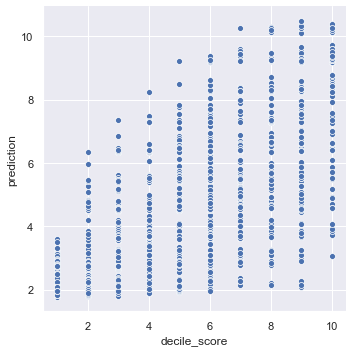

In [2037]:
sns.relplot(x="decile_score", y="prediction", data=X, kind="scatter")

Text(0, 0.5, 'decile_score')

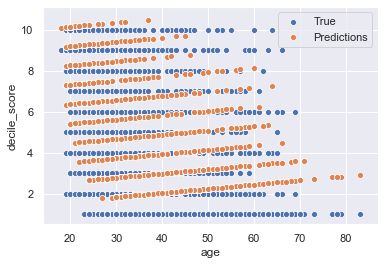

In [2038]:
sns.scatterplot(x=X["age"], y=X["decile_score"], label = 'True')
sns.scatterplot(x=X["age"], y=X["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("decile_score")

In [2039]:
X["error"] = abs(X["decile_score"]-X["prediction"])

In [2040]:
X.head()

index  age  v_decile_score  decile_score  prediction     error
0   1070   37               1             1    1.970641  0.970641
1  11648   23               5             4    5.472164  1.472164
2    543   30               2             1    2.774430  1.774430
3   7788   34               1             2    1.909277  0.090723
4   4025   40               1             2    2.032005  0.032005

In [2041]:
X.error.describe()

count    2352.000000
mean        1.441524
std         1.095448
min         0.008904
25%         0.680493
50%         1.237120
75%         1.794885
max         6.939204
Name: error, dtype: float64

# Linear Regression Violent Decile Score Entire DataSet

In [2042]:
VLinComp = compas.select_dtypes(np.number).fillna(0)

In [2043]:
Vcor = VLinComp.corr()
Vcor_target = abs(Vcor["v_decile_score"])
Vrelevant_features = Vcor_target[Vcor_target > .5]

In [2044]:
DROP = ['Unnamed: 0', "priors_count", 'id','decile_score.1', "juv_fel_count", "juv_misd_count", "juv_other_count",  "is_recid", "is_violent_recid"]
VLinComp = VLinComp.drop(DROP, axis =1)

In [2045]:
Vtargetvariable = "v_decile_score"
Vindependentvariables = VLinComp.drop(columns=Vtargetvariable).columns

In [2046]:
VX_train, VX_test, Vy_train, Vy_test = train_test_split(
     VLinComp[Vindependentvariables],
     VLinComp[Vtargetvariable], 
     test_size=0.2,
    random_state = 13,)

In [2047]:
Vmodel = LinearRegression()
Vmodel.fit(VX_train, Vy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2048]:
Vindependentvariables = VLinComp.columns
Vtargetvariables = "Vtargetvariables"

In [2049]:
Vpredictions = Vmodel.predict(VX_test)

In [2050]:
V = VX_test.reset_index().copy() 
V["V_decile_score"] = Vy_test.tolist()
V["prediction"] = Vpredictions

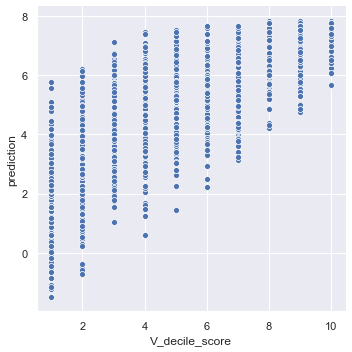

In [2051]:
sns.relplot(x="V_decile_score", y="prediction", data=V, kind="scatter")

Text(0, 0.5, 'Vdecile_score')

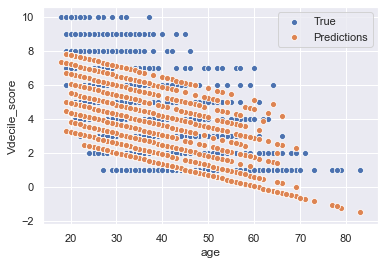

In [2052]:
sns.scatterplot(x=V["age"], y=V["V_decile_score"], label = 'True')
sns.scatterplot(x=V["age"], y=V["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("Vdecile_score")

In [2053]:
V["error"] = abs(V["V_decile_score"]-V["prediction"])

In [2054]:
V.head()

index  age  decile_score  V_decile_score  prediction     error
0   1070   37             1               1    1.539418  0.539418
1  11648   23             4               5    4.168556  0.831444
2    543   30             1               2    2.001623  0.001623
3   7788   34             2               1    2.305749  1.305749
4   4025   40             2               1    1.909573  0.909573

In [2055]:
V.error.describe()

count    2352.000000
mean        1.080619
std         0.884090
min         0.001623
25%         0.384991
50%         0.838410
75%         1.569866
max         4.755214
Name: error, dtype: float64

# Lin Regression African Americans

In [2056]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(6,6)}) 
%matplotlib inline

In [2057]:
compas = pd.read_csv("Compas.csv")

CompasAfricanAmericans = compas[(compas.race == "African-American")]
LinCompAfr = CompasAfricanAmericans.select_dtypes(np.number).fillna(0)
corAfr = LinCompAfr.corr()
cor_targetAfr = abs(corAfr["decile_score"])
relevant_featuresAfr = cor_targetAfr[cor_targetAfr > .4]
relevant_featuresAfr

decile_score      1.000000
v_decile_score    0.740446
decile_score.1    1.000000
Name: decile_score, dtype: float64

In [2058]:
DROP = ['Unnamed: 0', "priors_count", 'id','decile_score.1', "juv_fel_count", "juv_misd_count", "juv_other_count",  "is_recid", "is_violent_recid"]
LinCompAfr = LinCompAfr.drop(DROP, axis =1)

In [2059]:
targetvariablesAfr = "decile_score"
independentvariablesAfr = LinCompAfr.drop(columns=targetvariablesAfr).columns

In [2060]:
X_trainAfr, X_testAfr, y_trainAfr, y_testAfr = train_test_split(
     LinCompAfr[independentvariablesAfr],   # X
     LinCompAfr[targetvariablesAfr], # y
     test_size=0.2,
    random_state = 12)

In [2061]:
modelAfr = LinearRegression()
modelAfr.fit(X_trainAfr, y_trainAfr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2062]:
predictionsAfr = modelAfr.predict(X_testAfr)

In [2063]:
Afr = X_testAfr.reset_index().copy() 
Afr["decile_score"] = y_testAfr.tolist()
Afr["prediction"] = predictionsAfr

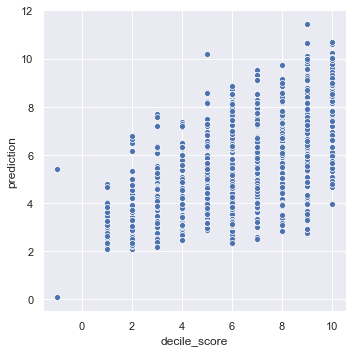

In [2064]:
sns.relplot(x="decile_score", y="prediction", data=Afr, kind="scatter")

Text(0, 0.5, 'decile_score')

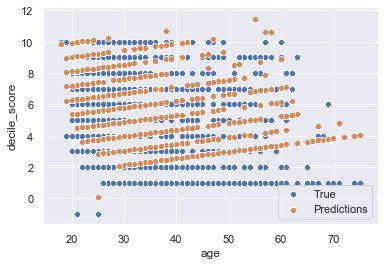

In [2065]:
sns.scatterplot(x=Afr["age"], y=Afr["decile_score"], label = 'True')
sns.scatterplot(x=Afr["age"], y=Afr["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("decile_score")

In [2066]:
Afr["error"] = abs(Afr["decile_score"]-Afr["prediction"])

In [2067]:
Afr.head()

index  age  v_decile_score  decile_score  prediction     error
0   5304   42               3             4    4.468156  0.468156
1    925   28               7             7    7.529444  0.529444
2  10800   20               8             5    8.102811  3.102811
3    759   29               6             7    6.657480  0.342520
4   5193   55               1             1    3.193452  2.193452

In [2068]:
Afr.error.describe()

count    1163.000000
mean        1.580950
std         1.143392
min         0.001001
25%         0.683939
50%         1.385044
75%         2.201403
max         6.401607
Name: error, dtype: float64

# Lin Regression Decile Score White

In [2069]:
CompasWhite = compas[(compas.race == "Caucasian")]
LinCompWh = CompasWhite.select_dtypes(np.number).fillna(0)
corWh = LinCompWh.corr()
cor_targetWh = abs(corWh["decile_score"])
relevant_featuresWh = cor_targetWh[cor_targetWh > .4]
relevant_featuresWh

age               0.43710
decile_score      1.00000
v_decile_score    0.74415
decile_score.1    1.00000
Name: decile_score, dtype: float64

In [2070]:
DROP = ['Unnamed: 0', "priors_count", 'id','decile_score.1', "juv_fel_count", "juv_misd_count", "juv_other_count",  "is_recid", "is_violent_recid"]
LinCompWh = LinCompWh.drop(DROP, axis =1)

In [2071]:
targetvariablesWh = "decile_score"
independentvariablesWh = LinCompWh.drop(columns=targetvariablesWh).columns

In [2072]:
X_trainWh, X_testWh, y_trainWh, y_testWh = train_test_split(
     LinCompWh[independentvariablesWh],
     LinCompWh[targetvariablesWh],
     test_size=0.2,
    random_state = 12)

In [2073]:
modelWh = LinearRegression()
modelWh.fit(X_trainWh, y_trainWh)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2074]:
predictionsWh = modelWh.predict(X_testWh)

In [2075]:
Wh = X_testWh.reset_index().copy() 
Wh["decile_score"] = y_testWh.tolist()
Wh["prediction"] = predictionsWh

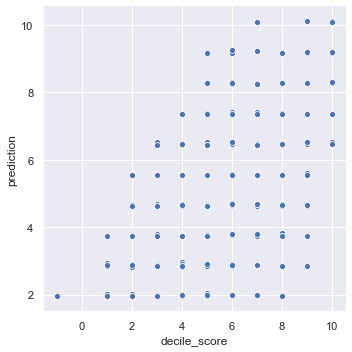

In [2076]:
sns.relplot(x="decile_score", y="prediction", data=Wh, kind="scatter")

Text(0, 0.5, 'decile_score')

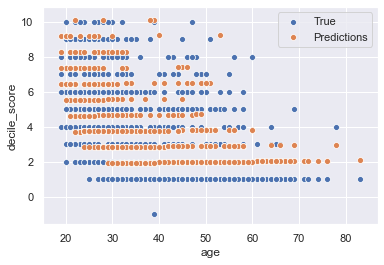

In [2077]:
sns.scatterplot(x=Wh["age"], y=Wh["decile_score"], label = 'True')
sns.scatterplot(x=Wh["age"], y=Wh["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("decile_score")

In [2078]:
Wh["error"] = abs(Wh["decile_score"]-Wh["prediction"])

In [2079]:
Wh.head()

index  age  v_decile_score  decile_score  prediction     error
0  10844   50               1             1    1.984860  0.984860
1  11326   51               3             2    3.803674  1.803674
2    279   38               2             5    2.860664  2.139336
3   1864   36               1             1    1.947225  0.947225
4   7034   25               6             5    6.457968  1.457968

In [2080]:
Wh.error.describe()

count    817.000000
mean       1.366638
std        1.044426
min        0.000989
25%        0.831094
50%        1.006366
75%        1.836471
max        6.158153
Name: error, dtype: float64